In [41]:
import os
os.chdir('/home/jovyan/work')
import init
import reading
import do_calibration
import aavso
import numpy as np
import pandas as pd
from do_muniwin import write_munifind_single
from do_muniwin import getBestComparisonStars
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import re

comparison_stars = []
with open(init.basedir + 'munifind.txt', 'r') as fp:
    for i, line in enumerate(fp):
        if i == 1:
            print(line)# 26th line
            m = re.search('Reference star:\s*(\d+),', line)            
            comparison_stars.append(int(m.group(1)))
            break
print(comparison_stars)

Reference star: 245, Aperture: 12

[245]


In [53]:
ref_index = do_calibration.find_reference_frame_index()
print('reference index is', ref_index)
match_file = 'match000???.pht'
aperture_range = np.arange(0.2, 10, 0.2)
results = []
for aperture in aperture_range:
    print('aperture:', aperture)
    write_munifind_single(match_file, aperture)
    result = getBestComparisonStars(10000)
    results.append(result)

reference index is 2027
aperture: 0.2
write munifind
max goodpoints: 57
min stdev: 0.00606
    STAR  MEAN_MAG    STDEV  GOODPOINTS
4   1991  -0.26472  0.00606          46
1   1104  -0.88168  0.00617          54
13     7   0.70143  0.00639          56
0      1  -0.89218  0.00657          57
8      4   0.38418  0.00687          56
Comparison stars:        STAR  MEAN_MAG    STDEV  GOODPOINTS
0        1  -0.89218  0.00657          57
5        2  -0.11915  0.00697          57
14      10   0.72882  0.00726          57
19      13   0.97090  0.00728          57
16      11   0.87696  0.00752          57
15       8   0.73767  0.00794          57
34      16   1.40231  0.00808          57
10       5   0.55827  0.00830          57
12       6   0.69355  0.00851          57
42      24   1.51721  0.00871          57
35      23   1.40362  0.00946          57
63      41   1.76583  0.00982          57
36     290   1.43289  0.00999          57
48      28   1.57172  0.01001          57
68     119   1.82794

First star: 1, second star: 2
[ 0.0004   0.0004   0.0004   0.0004   0.00401  0.00401  0.00401  0.00401
  0.00401  0.00453  0.00453  0.00453  0.00453  0.00453  0.00768  0.00768
  0.00768  0.00768  0.00768  0.01176  0.01176  0.01176  0.01176  0.01176
  0.00442  0.00442  0.00442  0.00442  0.00442  0.00129  0.00129  0.00129
  0.00129  0.00129  0.00015  0.00015  0.00015  0.00015  0.00015  0.0004
  0.0004   0.0004   0.0004   0.0004 ]


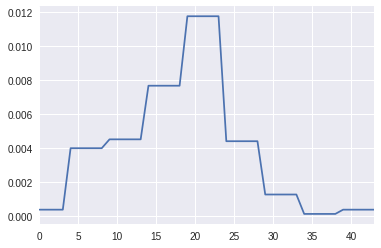

In [62]:
first_star = df['STAR'].iloc[0]
second_star = df['STAR'].iloc[1]
print("First star: {}, second star: {}".format(first_star, second_star))
diff_result_array = []
for df in results:
    first_stdev = df.loc[df['STAR'] == first_star]['STDEV']
    second_stdev = df.loc[df['STAR'] == second_star]['STDEV']
    #print("first: {},\n second: {}, {}".format(first_stdev, second_stdev, type(first_stdev)))
    diff_result = second_stdev.values - first_stdev.values
    #print(diff_result)
    #if(len(diff_result) == 1):
    diff_result_array = np.append(diff_result_array, diff_result)
print(diff_result_array)
%matplotlib inline
pd.Series(diff_result_array).plot()

### het idee is om van de munifind telkens 2 sterren te nemen, comparison ster + check ster? En dat verschil plotten. Beetje raar...